<a href="https://colab.research.google.com/github/riskydav/Belajar-Python/blob/main/Python_Machine_Learning_For_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementasi Machine Learning dengan Regresi Linear 
Berikut adalah tahapan dlam membuat *machine learning* sederhana.

* Memahami permasalahan yang akan diselesaikan.
* Memilih metode yang akan digunakan.
* Tahapan mempersiapkan data.
* Tahapan implementasi.

# Contoh Studi Kasus dan Dataset
Pada bagian ini akan dibahas studi kasus sederhana untuk membuat machine learning dengan menerapkan metode *Simple Regresi Linear.* Sebuah penelitian dilakukan untuk mengetahui pengaruh lama bekerja terhadap pendapatan gaji sebuah perusahaan.

Simple regresi linear akan digunakan untuk memprediksi nilai gaji yang akan diperoleh berdasarkan lama bekerja. Disamping itu hasil machine learning juga akan bisa melihat korelasi antara lama bekerja dengan nilai pendapatan yang diperoleh. Output lain yang bisa diperoleh adalah grafik korelasinya antara kedua variabel tersebut.

# Memahami Algoritma Simple Regresi Linear
*Simple Regresi Linear* adalah salah satu metode yang biasa digunakan untuk menguji sejauh mana hubungan sebab akibat antara dua buah variabel. Kedua variabel tersebut sering disebut sebagai variabel faktor penyebab (X) terhadap variabel akibat (Y). Variabel X seringkali disebut sebagai *Predictor,* sedangkan variabel Y seringkali disebut sebagai *Response.*

*Simple Regresi Linear* seringkali dipergunakan untuk melakukan prediksi atau peramalan baik tentang karakteristik baik yang bersifat kualitas maupun kuantitas.

Model persamaan *Simple Regresi Linear*

**Y = a + bX**

dimana:
* Y = Variabel Akibat *(Response)* yang juga disebut sebagai *dependent variable.*
* X = Variabel Faktor Penyebab atau *predictor* yang juga merupakan *independent variable.*
* a = konstanta.
* b = koefisien regresi, yaitu besaran *Response* yang ditimbulkan oleh *Predictor.*

Penjelasan dari grafik diatas:
* Jumlah pembelian adalah Y, atau variabel akibat yang juga disebut *dependent variable.*
* Biaya Promosi adalah X, atau predictor, variabel faktor penyebab, yang juga disebut sebagai variabel *independent.*
* Garis lurus (warna merah) disebut sebagai *predicted value* dari Y untuk X.
* Titik-titik yang berada di seputar garis lurus tersebut adalah *observed* value.

# Implementasi Program dengan Python

## Mempersiapkan Library
Berikut Library yang akan digunakan:
* NumPy, yaitu library yang akan digunakan untuk kebutuhan *scientific* dan matematika.
* Pandas, yaitu library yang digunakan untuk manipulasi data seperti membuat tabel, mengubah dimensi data, mengecek data dan sebagainya.
* Matplotlib, yaitu library yang digunakan untuk membuat grafik plot sesuai kebutuhan.
* Sklearn, adala library untuk berbagai metode dan algoritma yang digunakan dalam *machine learning.*

1. Import Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

2. Memanggil Dataset

In [2]:
!wget -O datagaji1.csv https://raw.githubusercontent.com/riskydav/Belajar-Python/main/Data/datagaji1.csv


--2021-10-03 18:47:54--  https://raw.githubusercontent.com/riskydav/Belajar-Python/main/Data/datagaji1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456 [text/plain]
Saving to: ‘datagaji1.csv’

datagaji1.csv       100%[===================>]     456  --.-KB/s    in 0s      

2021-10-03 18:47:54 (18.9 MB/s) - ‘datagaji1.csv’ saved [456/456]



## Melihat isi dataset.
Pandas bisa digunakan untuk menampilkan sebagian isi dari dataset dengan menggunakan perintah sebagai berikut.

In [3]:
data = pd.read_csv('datagaji1.csv', sep=',')
data.head()

Tahun   Gaji
0    5.1  66029
1    5.3  83088
2    5.9  81363
3    6.0  93940
4    6.8  91738

Kode tersebut jika dieksekusi akan menghasilkan 3 variabel baru yang dapat diproses yaitu:
* Variabel dataset: berisi keseluruhan data,
* Variabel X: berisi data sebagai independent variable.
* Variabel y: berisi data sebagai dependent variable.

Jika ingin melihat variabel-variabel dalam dataset, bisa menggunakan perintah sebagai berikut:

Atau jika ingin melihat *shape* dari dataset bisa dilakukan perintah sebagai berikut.

In [4]:
data.shape

(40, 2)

In [5]:
# Memilih variable X
X = data.iloc[:,:-1].values
X

array([[ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 1.5],
       [ 1.7],
       [ 1.9],
       [ 2.4],
       [ 2.6],
       [ 3.3],
       [10.1],
       [10.3],
       [ 8.1],
       [ 8.3]])

In [6]:
# Memilih Variable Y
y = data.iloc[:,1].values
y

array([ 66029,  83088,  81363,  93940,  91738,  98273,  57081,  61111,
        67938,  57189,  63218,  55794,  56957,  39343,  46205,  37731,
        43525,  39891,  56642,  60150,  54445,  64445, 105582, 116969,
       112635, 122391, 121872, 101302, 113812, 109431,  39593,  46455,
        37981,  43775,  40141,  56892, 122000, 121000, 101000, 101800])

## Split Dataset
Pada bagian ini digunakan untuk membagi dataset manjadi dua bagian yaitu Training Set dan Testing Set. Training Set akan digunakan sebagai data latih, yaitu menggunakan 80% dari data. Sementara Testing Set digunakan untuk data uji dan dalam kasus ini menggunakan 20% dari data.

In [7]:
# Split DataSet
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [8]:
X_train

array([[ 3.9],
       [ 1.5],
       [ 8.2],
       [ 4. ],
       [ 2.9],
       [ 8.7],
       [ 7.9],
       [ 3.3],
       [10.3],
       [ 5.9],
       [ 8.3],
       [ 1.5],
       [ 2.6],
       [ 2. ],
       [10.1],
       [ 4.9],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 1.3],
       [ 2.4],
       [ 4.5],
       [ 1.9],
       [ 5.3],
       [10.5],
       [ 4. ],
       [ 1.7],
       [ 9.6],
       [ 4.1],
       [ 9.5],
       [ 3.2],
       [ 3. ],
       [ 3.7],
       [ 8.1],
       [ 6. ],
       [ 5.1]])

In [9]:
X_test

array([[ 9. ],
       [ 3.2],
       [10.3],
       [ 6.8]])

## Visualisasi Data
Visualisasi data antara Nilai Gaji berdasarkan Lama Bekerja

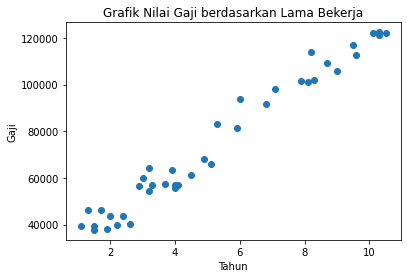

In [10]:
plt.scatter(data['Tahun'], data['Gaji'])
plt.xlabel('Tahun')
plt.ylabel('Gaji')
plt.title('Grafik Nilai Gaji berdasarkan Lama Bekerja')
plt.show()

## *Fitting* metode Simple Linear Regression
Bagian ini digunakan untuk melakukan fitting metode Simple Linear Regression pada training set.

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Dengan demikian, *fitting* Simple Linear Regression pada training set (X_train dan y_train) sudah dilakukan dan machine learning dengan model *Simple Regresi Linear* sudah siap dijalankan dengan kondisi seperti di atas.

In [12]:
regressor.score(X_train, y_train)

0.963085677471505

## Melakukan prediksi untuk hasil Test set.

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
y_pred.round(2)

array([110927.92,  55356.33, 123383.63,  89849.04])

In [15]:
y_test

array([105582,  54445, 122391,  91738])

Sampai pada tahap ini, machine learning sudah menghasilkan variabel y_test dan y_pred sebagai berikut.
* Variabel y_test adalah data sesungguhnya (observasi) dari nilai penjualan
* Variabel y_pred adalah data hasil prediksi dari nilai penjualan *machine learning.*

## Visualisasi hasil *Machine Learning.*
Visualisasi menggunakan grafik plot sehingga gambaran hasil dari model secara keseluruhan dapat kita lihat.

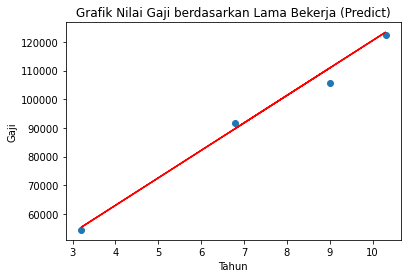

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel('Tahun')
plt.ylabel('Gaji')
plt.title('Grafik Nilai Gaji berdasarkan Lama Bekerja (Predict)')
plt.show()

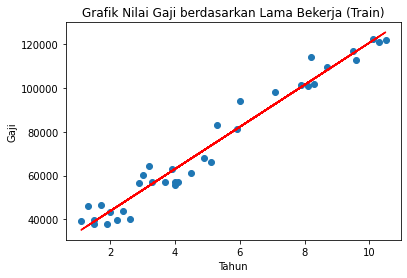

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Tahun')
plt.ylabel('Gaji')
plt.title('Grafik Nilai Gaji berdasarkan Lama Bekerja (Train)')
plt.show()